In [1]:
#Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#encoders
import category_encoders as ce

# Metrics
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix

# from yellowbrick.model_selection import RFECV # Yellowbrick RFECV *
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

In [2]:
pd.set_option('display.max_columns', 500)
pd.options.display.max_info_columns = 500

In [83]:
df=pd.read_csv('CSVs\df_acidentes_sp_moto_CLEAN2.csv',sep=',')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53228 entries, 0 to 53227
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53228 non-null  int64  
 1   Mes                   53228 non-null  int64  
 2   Dia                   53228 non-null  int64  
 3   Dia da Semana         53228 non-null  object 
 4   Turno                 53228 non-null  object 
 5   Município             53228 non-null  object 
 6   Jurisdição            53228 non-null  object 
 7   Administração         53228 non-null  object 
 8   Conservação           53228 non-null  object 
 9   Latitude              53228 non-null  float64
 10  Longitude             53228 non-null  float64
 11  Condições Climáticas  53228 non-null  object 
 12  Iluminação            53228 non-null  object 
 13  Mão de direção        53228 non-null  object 
 14  Relevo                53228 non-null  object 
 15  Superfície da via  

In [85]:
df.columns

Index(['Ano', 'Mes', 'Dia', 'Dia da Semana', 'Turno', 'Município',
       'Jurisdição', 'Administração', 'Conservação', 'Latitude', 'Longitude',
       'Condições Climáticas', 'Iluminação', 'Mão de direção', 'Relevo',
       'Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
       'Tipo de Via', 'Acidente Fatal', 'Mes_sin', 'Mes_cos',
       'dias_semana_num', 'dias_semana_norm', 'dias_semana_sin',
       'dias_semana_cos', 'Hora', 'Minuto', 'horario_float', 'horario_sin',
       'horario_cos'],
      dtype='object')

In [86]:
# escolhendo colunas
df1 = df[['Acidente Fatal','Turno','Município','Jurisdição','Administração','Conservação',
    'Latitude', 'Longitude','Condições Climáticas', 'Iluminação', 'Mão de direção', 
    'Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
    'Tipo de Via','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos',
    'horario_sin','horario_cos']]# retirado a feature "ANO" após análise de feature importance #,'Ano'

### Splitando os dados
-Definir melhor % de treino e teste

-Fazer por validação cruzada?

-entender melhor o stratify...é pra tudo ou só pra variavel target?

In [87]:
#features
X = df1.drop('Acidente Fatal',axis=1)
#target variable
y = df1['Acidente Fatal']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [88]:
X_test.to_csv('X_test.csv',index=False)

Encoders para cat features

In [89]:
#dividindo as categoris
target = 'Acidente Fatal'

cat_features = ['Turno','Município','Jurisdição','Administração','Conservação','Condições Climáticas', 'Iluminação', 'Mão de direção','Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado','Tipo de Via']

num_features = ['Latitude', 'Longitude','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos','horario_sin','horario_cos']

In [90]:
# referencia# https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
encoder = ce.TargetEncoder(cols=cat_features,smoothing=0, return_df=True)

X_train_proc = encoder.fit_transform(X_train, y_train) #aqui ele da o fit e carrega as informações dentro do elemento encoder
X_test_proc = encoder.transform(X_test) # aqui nao precisa chamar o y_train pq ele já tem as informações da linha anterior

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [91]:
X_train_proc

,Turno,Município,Jurisdição,Administração,Conservação,Latitude,Longitude,Condições Climáticas,Iluminação,Mão de direção,Relevo,Superfície da via,Tipo de pavimento,Tipo de pista,Traçado,Tipo de Via,Mes_sin,Mes_cos,dias_semana_sin,dias_semana_cos,horario_sin,horario_cos
10673,0.236215,0.066648,0.071956,0.072626,0.072646,-23.5096,-46.73088,0.040515,0.134350,0.083680,0.077502,0.087397,0.077537,0.078569,0.078981,0.071267,-1.000000,-1.836970e-16,0.433884,-0.900969,0.418660,0.908143
35787,0.050540,0.059151,0.071956,0.072626,0.072646,-23.6264,-46.51830,0.040515,0.053516,0.073043,0.077502,0.087397,0.077537,0.076867,0.078981,0.071267,-0.866025,-5.000000e-01,0.781831,0.623490,0.936672,-0.350207
44415,0.048958,0.066648,0.071956,0.072626,0.072646,-23.4873,-46.59328,0.040515,0.053516,0.073043,0.077502,0.087397,0.077537,0.078569,0.078981,0.071267,1.000000,6.123234e-17,0.781831,0.623490,-0.275637,-0.961262
46781,0.048958,0.081465,0.071956,0.072626,0.072646,-23.4179,-46.50711,0.040515,0.053516,0.073043,0.077502,0.087397,0.077537,0.076867,0.078981,0.071267,0.866025,5.000000e-01,0.781831,0.623490,-0.522499,-0.852640
34570,0.089809,0.108932,0.071956,0.072626,0.072646,-23.6581,-46.44797,0.040515,0.053516,0.073043,0.077502,0.087397,0.077537,0.076867,0.078981,0.071267,-0.866025,-5.000000e-01,-0.433884,-0.900969,-0.900698,0.434445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43134,0.089809,0.066648,0.071956,0.072626,0.072646,-23.6259,-46.64770,0.040515,0.134350,0.073043,0.077502,0.087397,0.077537,0.076867,0.078981,0.071267,0.866025,-5.000000e-01,-0.781831,0.623490,-0.863836,0.503774
7992,0.050540,0.081465,0.107726,0.106522,0.088757,-23.4431,-46.44463,0.040515,0.053516,0.073043,0.077502,0.087397,0.077537,0.078525,0.078981,0.116007,-0.866025,5.000000e-01,0.974928,-0.222521,0.923880,-0.382683
35958,0.050540,0.059151,0.071956,0.072626,0.072646,-23.6726,-46.53829,0.040515,0.053516,0.083680,0.078172,0.087397,0.077537,0.078569,0.070281,0.071267,-0.866025,-5.000000e-01,-0.974928,-0.222521,0.870356,-0.492424
24219,0.089809,0.066648,0.071956,0.072626,0.072646,-23.5553,-46.62621,0.040515,0.134350,0.083680,0.077502,0.087397,0.077537,0.076867,0.080521,0.071267,0.500000,8.660254e-01,0.781831,0.623490,-0.263031,0.964787


In [92]:
# criando modelo baseline
model1 = RandomForestClassifier(random_state=42,class_weight='balanced')#,max_depth=5) #definindo o classificador
mdl1 = model1.fit(X_train_proc,y_train)#treinando o modelo

In [93]:
# Get predicted class, treshold 0.5
y_pred1= mdl1.predict(X_test_proc)

# Get predicted probabilities
y_pred_probs_1 = mdl1.predict_proba(X_test_proc)

In [94]:
y_pred_probs_1

array([[0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.95, 0.05],
       [0.96, 0.04],
       [0.99, 0.01]])

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


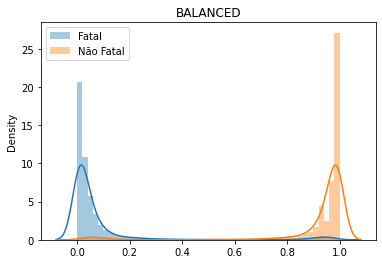

In [95]:
sns.distplot(y_pred_probs_1[:,1], label='Fatal')
sns.distplot(y_pred_probs_1[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

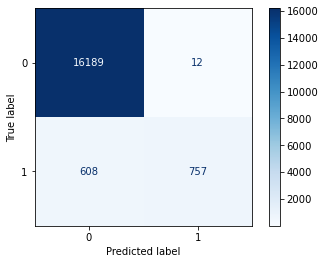

In [96]:
plot_confusion_matrix(model1, X_test_proc, y_test, cmap='Blues')

In [97]:
print('Random Forest Test')
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1-Score:', f1_score(y_test, y_pred1))

Random Forest Test
Accuracy: 0.964704542866902
Precision: 0.9843953185955787
Recall: 0.5545787545787546
F1-Score: 0.7094657919400187


In [98]:
#checando overfit
y_pred_train= mdl1.predict(X_train_proc)

print('Randon Forest Train')
print('Accuracy:',accuracy_score(y_train,y_pred_train))
print('Precision:',precision_score(y_train,y_pred_train))
print('Recall',recall_score(y_train,y_pred_train))
print('F1-Score:', f1_score(y_train, y_pred_train))

Randon Forest Train
Accuracy: 1.0
Precision: 1.0
Recall 1.0
F1-Score: 1.0


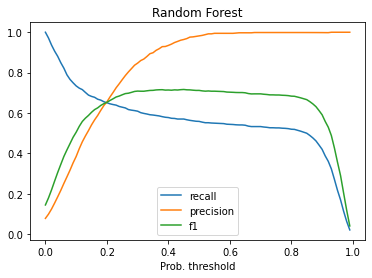

In [99]:
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl1.predict_proba(X_test_proc)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('Random Forest')
plt.show()

Feature importance based on mean decrease in impurity (MDI)

In [100]:
import time
import numpy as np

start_time = time.time()
importances = model1.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in model1.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.136 seconds


In [101]:
importances

array([0.04131395, 0.03598948, 0.00577225, 0.00604934, 0.00954409,
       0.08421533, 0.08401737, 0.29355937, 0.02841728, 0.01456434,
       0.01306898, 0.02283609, 0.00137435, 0.02060974, 0.01881655,
       0.00732095, 0.0322881 , 0.0349595 , 0.02728607, 0.02758375,
       0.08826449, 0.10214863])

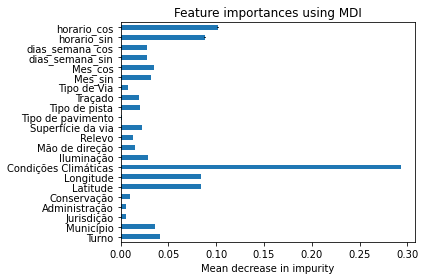

In [102]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

Text(0.5, 1.0, 'Feature importances using MDI')

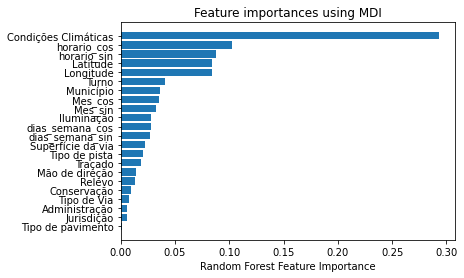

In [103]:
sorted_idx = model1.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature importances using MDI")

Feature importance based on feature permutation

In [24]:
perm_importance = permutation_importance(model1, X_test_proc, y_test)

Text(0.5, 0, 'Permutation Importance')

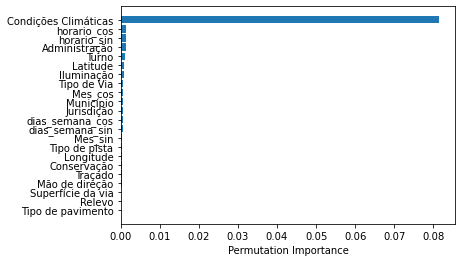

In [25]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [26]:
# Investigando a feature 'ano'

In [28]:
# df_fatal_year =  pd.DataFrame(df1['Ano'].loc[df1['Acidente Fatal']==1].value_counts())
# df_fatal_year.reset_index(inplace=True)
# df_fatal_year = df_fatal_year.rename(columns={'index': 'Ano', 'Ano': 'Fatal'})
# df_fatal_year

In [30]:
# df_year = pd.DataFrame(df1['Ano'].value_counts())
# df_year.reset_index(inplace=True)
# df_year = df_year.rename(columns={'index': 'Ano', 'Ano': 'Acidentes'})
# df_year

In [31]:
# df_Ano = df_year.merge(df_fatal_year,on='Ano')
# # df_Ano['Nao Fatal'] = df_Ano['Acidentes']-df_Ano['Fatal']
# df_Ano

In [32]:
# df_ano_mltd = df_Ano.melt(id_vars='Ano')
# df_ano_mltd

In [33]:
# sns.barplot(x=df_ano_mltd['Ano'],y=df_ano_mltd['value'],hue=df_ano_mltd['variable'])
# sns.barplot(x=df1['Ano'].loc[df1['Acidente Fatal']==1].value_counts().index,y=df1['Ano'].loc[df1['Acidente Fatal']==1].value_counts())

CONCLUSÃO: desde 2018, todos os acidentes reportados foram fatais. Retirar essa feature do dataset!

# RFE CV (Recursive Feature Extraction Cross-Validation)
### é melhor que o RFE pois conseguimos selecionar um score, tipo F1, accuracy etc...Já o RFE faz o calculo por feature importance....nesse caso o resultado foi o mesmo com ambos

In [34]:
# reference: https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

In [104]:
rfc1 = RandomForestClassifier(n_jobs=-1,random_state=42)
rfecv = RFECV(estimator=rfc1, step=1, scoring='f1_weighted') # f1_weighted to optimize
selector = rfecv.fit(X_train_proc, y_train)

In [105]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 10


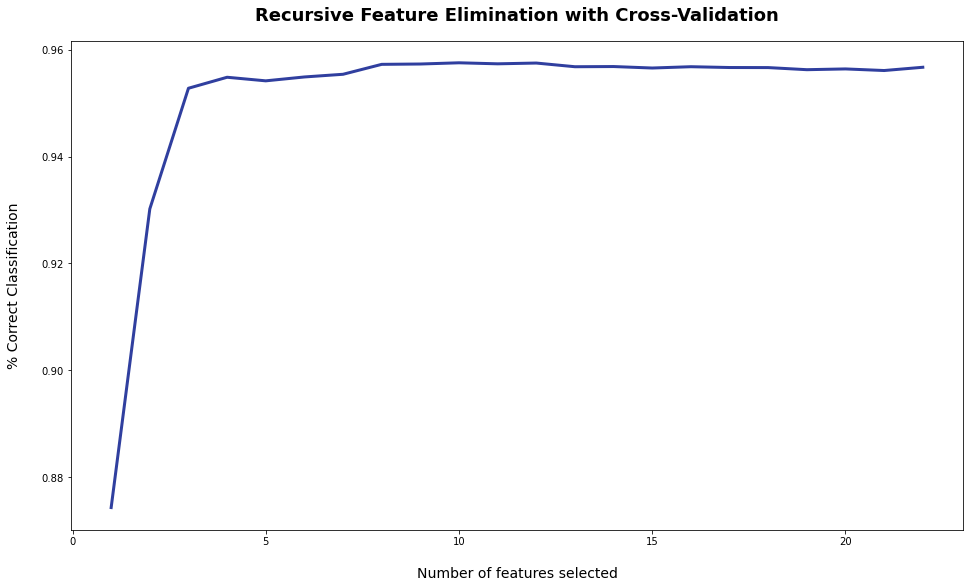

In [106]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [107]:
# quais features não são importantes
print(np.where(rfecv.support_ == False)[0])
# dropando essas features
X_dropped = X.copy()
X_dropped.drop(X_dropped.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  2  4  8  9 10 11 12 13 14 15 19]


In [108]:
# plotando feature importances da nossa random forest
rfecv.estimator_.feature_importances_

array([0.03596853, 0.03883775, 0.11002581, 0.10848305, 0.40597011,
       0.02906641, 0.0294745 , 0.03594979, 0.10236462, 0.10385942])

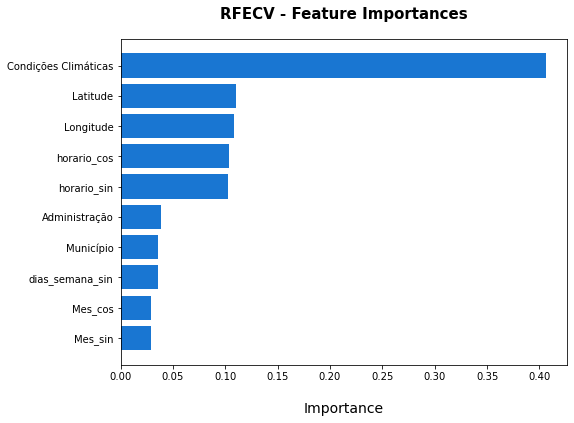

In [109]:
dset = pd.DataFrame()
dset['attr'] = X_dropped.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Conclusão: faremos um modelo com as variáveis acima apenAs....porém a única vairável que pode trazer problemas de input é a "ADMINISTRAÇÃO". Portanto iremos testar se sem ela o impacto é muito grande

In [41]:
# RFE (Recursive Feature Extraction)

In [42]:
# rfc2 = RandomForestClassifier(n_jobs=-1,random_state=42)
# rfe = RFE(estimator=rfc2, step=1, n_features_to_select=10) 
# selector2 = rfe.fit(X_train_proc, y_train)

In [43]:
# selector2.ranking_

In [44]:
# plt.barh(X.columns, selector2.ranking_)

## Criando Modelo 2 com 10 variáveis

In [110]:
X_train_proc.columns

Index(['Turno', 'Município', 'Jurisdição', 'Administração', 'Conservação',
       'Latitude', 'Longitude', 'Condições Climáticas', 'Iluminação',
       'Mão de direção', 'Relevo', 'Superfície da via', 'Tipo de pavimento',
       'Tipo de pista', 'Traçado', 'Tipo de Via', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'dias_semana_cos', 'horario_sin', 'horario_cos'],
      dtype='object')

In [111]:
#novos df's baseados no RFE CV 
X_train_proc2 = X_train_proc[['Município','Administração','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']] 
X_test_proc2 = X_test_proc[['Município','Administração','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']]

In [112]:
model2 = RandomForestClassifier(random_state=42,class_weight='balanced')#,max_depth=5) #definindo o classificador
mdl2 = model2.fit(X_train_proc2,y_train)#treinando o modelo

In [113]:
# Get predicted class, treshold 0.5
y_pred2= mdl2.predict(X_test_proc2)

# Get predicted probabilities
y_pred_probs_2 = mdl2.predict_proba(X_test_proc2)

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


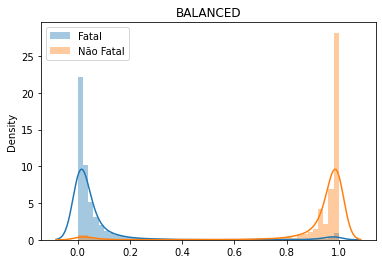

In [114]:
sns.distplot(y_pred_probs_2[:,1], label='Fatal')
sns.distplot(y_pred_probs_2[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

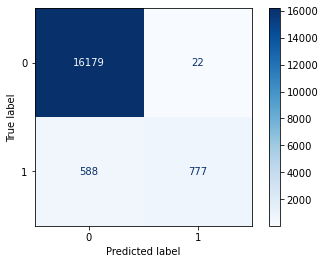

In [115]:
plot_confusion_matrix(model2, X_test_proc2, y_test, cmap='Blues')

In [116]:
print('Random Forest Test')
print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2))
print('F1-Score:', f1_score(y_test, y_pred2))

Random Forest Test
Accuracy: 0.9652738244335648
Precision: 0.9724655819774718
Recall: 0.5692307692307692
F1-Score: 0.7181146025878002


In [117]:
#checando overfit
y_pred_train2= mdl2.predict(X_train_proc2)

print('Randon Forest Train')
print('Accuracy:',accuracy_score(y_train,y_pred_train2))
print('Precision:',precision_score(y_train,y_pred_train2))
print('Recall',recall_score(y_train,y_pred_train2))
print('F1-Score:', f1_score(y_train, y_pred_train2))

Randon Forest Train
Accuracy: 1.0
Precision: 1.0
Recall 1.0
F1-Score: 1.0


## Criando modelo 3 (igual ao modelo 2 tirando ADM)

In [118]:
#novos df's baseados no RFE CV 
X_train_proc3 = X_train_proc[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']] 
X_test_proc3 = X_test_proc[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']]

In [119]:
model3 = RandomForestClassifier(random_state=42,class_weight='balanced')#,max_depth=5) #definindo o classificador
mdl3 = model3.fit(X_train_proc3,y_train)#treinando o modelo

In [120]:
# Get predicted class, treshold 0.5
y_pred3= mdl3.predict(X_test_proc3)

# Get predicted probabilities
y_pred_probs_3 = mdl3.predict_proba(X_test_proc3)

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


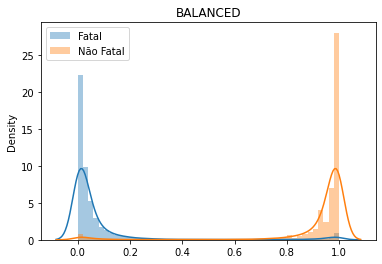

In [121]:
sns.distplot(y_pred_probs_3[:,1], label='Fatal')
sns.distplot(y_pred_probs_3[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

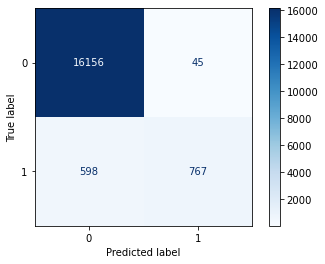

In [122]:
plot_confusion_matrix(model3, X_test_proc3, y_test, cmap='Blues')

In [123]:
print('Random Forest Test')
print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('F1-Score:', f1_score(y_test, y_pred3))

Random Forest Test
Accuracy: 0.9633951952635774
Precision: 0.9445812807881774
Recall: 0.5619047619047619
F1-Score: 0.7046394120349104


## Criando modelo 4 (igual ao modelo 3 incluindo dia_sem_cos)

In [124]:
#novos df's baseados no RFE CV 
X_train_proc4 = X_train_proc[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin','dias_semana_cos', 'horario_sin', 'horario_cos']] 
X_test_proc4 = X_test_proc[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin','dias_semana_cos', 'horario_sin', 'horario_cos']]

In [125]:
model4 = RandomForestClassifier(random_state=42,class_weight='balanced')#,max_depth=5) #definindo o classificador
mdl4 = model4.fit(X_train_proc4,y_train)#treinando o modelo

In [126]:
# Get predicted class, treshold 0.5
y_pred4= mdl4.predict(X_test_proc4)

# Get predicted probabilities
y_pred_probs_4 = mdl4.predict_proba(X_test_proc4)

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


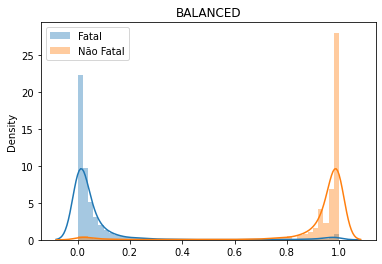

In [127]:
sns.distplot(y_pred_probs_4[:,1], label='Fatal')
sns.distplot(y_pred_probs_4[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

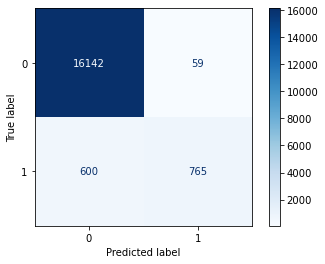

In [128]:
plot_confusion_matrix(model4, X_test_proc4, y_test, cmap='Blues')

In [129]:
print('Random Forest Test')
print('Accuracy:', accuracy_score(y_test, y_pred4))
print('Precision:', precision_score(y_test, y_pred4))
print('Recall:', recall_score(y_test, y_pred4))
print('F1-Score:', f1_score(y_test, y_pred4))

Random Forest Test
Accuracy: 0.9624843447569168
Precision: 0.9283980582524272
Recall: 0.5604395604395604
F1-Score: 0.6989492919141159


## comparando Modelos 1,2,3 e 4

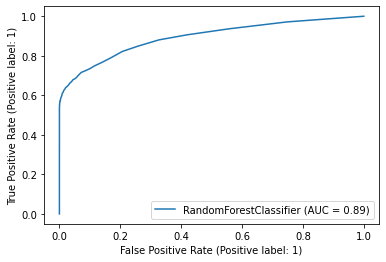

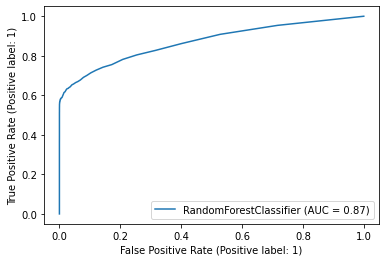

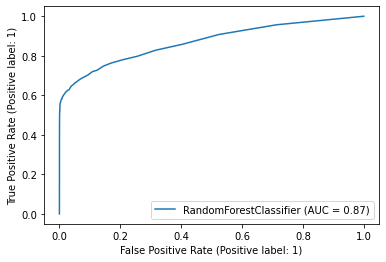

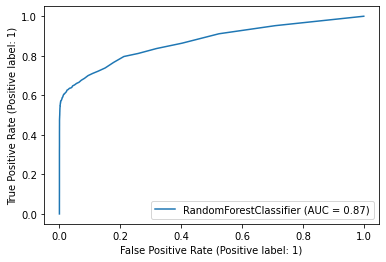

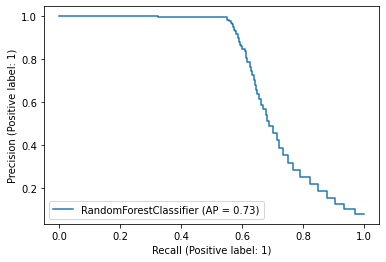

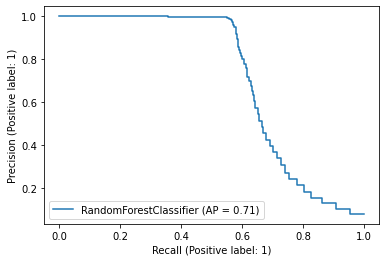

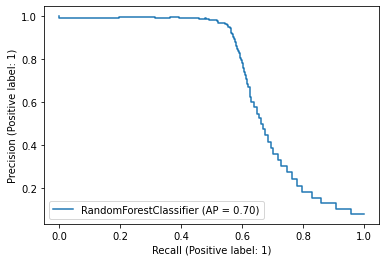

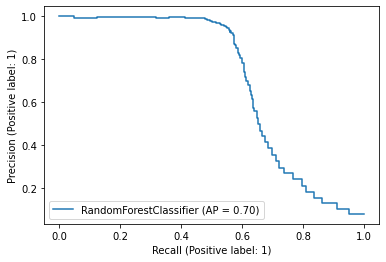

In [130]:
# roc
plot_roc_curve(model1, X_test_proc, y_test) 
plot_roc_curve(model2, X_test_proc2, y_test) 
plot_roc_curve(model3, X_test_proc3, y_test)
plot_roc_curve(model4, X_test_proc4, y_test) 

#pr
plot_precision_recall_curve(model1, X_test_proc, y_test)
plot_precision_recall_curve(model2, X_test_proc2, y_test) 
plot_precision_recall_curve(model3, X_test_proc3, y_test)
plot_precision_recall_curve(model4, X_test_proc4, y_test) 

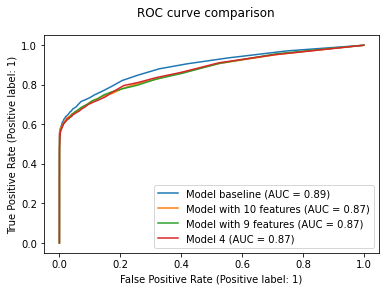

In [131]:
# Comparing ROC Curves
fig = plot_roc_curve(model1, X_test_proc, y_test,label='Model baseline (AUC = 0.89)')
fig = plot_roc_curve(model2, X_test_proc2, y_test,label='Model with 10 features (AUC = 0.87)', ax = fig.ax_)
fig = plot_roc_curve(model3, X_test_proc3, y_test,label='Model with 9 features (AUC = 0.87)', ax = fig.ax_)
fig = plot_roc_curve(model4, X_test_proc4, y_test,label='Model 4 (AUC = 0.87)', ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

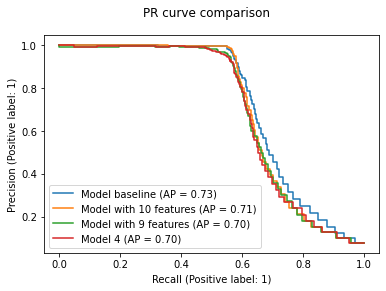

In [132]:
# Comparing ROC Curves
fig = plot_precision_recall_curve(model1, X_test_proc, y_test,label='Model baseline (AP = 0.73)')
fig = plot_precision_recall_curve(model2, X_test_proc2, y_test,label='Model with 10 features (AP = 0.71)', ax = fig.ax_)
fig = plot_precision_recall_curve(model3, X_test_proc3, y_test,label='Model with 9 features (AP = 0.70)', ax = fig.ax_)
fig = plot_precision_recall_curve(model4, X_test_proc4, y_test,label='Model 4 (AP = 0.70)', ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison")
plt.show() 

In [133]:
# Compare matrics
print('Baseline')
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1-Score:', f1_score(y_test, y_pred1))
print()
print('10 Features')
print('Accuracy:', accuracy_score(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2))
print('F1-Score:', f1_score(y_test, y_pred2))
print()
print('9 Features')
print('Accuracy:', accuracy_score(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('F1-Score:', f1_score(y_test, y_pred3))
print('Modelo 4')
print('Random Forest Test')
print('Accuracy:', accuracy_score(y_test, y_pred4))
print('Precision:', precision_score(y_test, y_pred4))
print('Recall:', recall_score(y_test, y_pred4))
print('F1-Score:', f1_score(y_test, y_pred4))

Baseline
Accuracy: 0.964704542866902
Precision: 0.9843953185955787
Recall: 0.5545787545787546
F1-Score: 0.7094657919400187

10 Features
Accuracy: 0.9652738244335648
Precision: 0.9724655819774718
Recall: 0.5692307692307692
F1-Score: 0.7181146025878002

9 Features
Accuracy: 0.9633951952635774
Precision: 0.9445812807881774
Recall: 0.5619047619047619
F1-Score: 0.7046394120349104
Modelo 4
Random Forest Test
Accuracy: 0.9624843447569168
Precision: 0.9283980582524272
Recall: 0.5604395604395604
F1-Score: 0.6989492919141159


# Conclusão: Por enquanto o modelo escolhido é o 3! com 9 features sendo elas todas possíveis de inluir como input do usuário

In [134]:
# # Exportando dfs de treino
X_train_3 = X_train[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']]
X_train_3.to_csv('Models\X_train.csv',index=False)
y_train.to_csv('Models\y_train.csv',index=False)

In [135]:
X_test_proc3.columns

Index(['Município', 'Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin',
       'Mes_cos', 'dias_semana_sin', 'horario_sin', 'horario_cos'],
      dtype='object')

In [80]:
df1['Conservação'].value_counts()

PREFEITURA                     46612
DR10 - São Paulo                2031
ECOVIAS                          868
NOVADUTRA                        785
VIAOESTE                         716
ECOPISTAS                        591
AUTOBAN                          496
AUTOPISTA REGIS BITTENCOURT      479
CCR RODOANEL                     369
AUTOPISTA FERNÃO DIAS            154
SPMAR                             85
DR02 - Itapetininga               42
Name: Conservação, dtype: int64

In [82]:
df1['Condições Climáticas'].value_counts()

BOM                 46154
CHUVA                4249
NUBLADO              2576
NEVOEIRO/NEBLINA      247
URBANA                  1
VENTO                   1
Name: Condições Climáticas, dtype: int64

In [72]:
df_fatal_conc =  pd.DataFrame(df1['Conservação'].loc[df1['Acidente Fatal']==1].value_counts())
df_fatal_conc.reset_index(inplace=True)
df_fatal_conc = df_fatal_conc.rename(columns={'index': 'Conservação', 'Conservação': 'Fatal'})
df_fatal_conc

,Conservação,Fatal
0,PREFEITURA,3380
1,DR10 - São Paulo,255
2,ECOVIAS,84
3,NOVADUTRA,77
4,AUTOBAN,69
5,VIAOESTE,68
6,AUTOPISTA REGIS BITTENCOURT,53
7,CCR RODOANEL,52
8,ECOPISTAS,42
9,AUTOPISTA FERNÃO DIAS,29


In [73]:
df_conc = pd.DataFrame(df1['Conservação'].value_counts())
df_conc.reset_index(inplace=True)
df_conc = df_conc.rename(columns={'index': 'Conservação', 'Conservação': 'Acidentes'})
df_conc

,Conservação,Acidentes
0,PREFEITURA,46612
1,DR10 - São Paulo,2031
2,ECOVIAS,868
3,NOVADUTRA,785
4,VIAOESTE,716
5,ECOPISTAS,591
6,AUTOBAN,496
7,AUTOPISTA REGIS BITTENCOURT,479
8,CCR RODOANEL,369
9,AUTOPISTA FERNÃO DIAS,154


In [74]:
df_Conservação = df_conc.merge(df_fatal_conc,on='Conservação')
df_Conservação['Perc. Fatal'] = 100*df_Conservação['Fatal']/df_Conservação['Acidentes']
df_Conservação

,Conservação,Acidentes,Fatal,Perc. Fatal
0,PREFEITURA,46612,3380,7.251352
1,DR10 - São Paulo,2031,255,12.555391
2,ECOVIAS,868,84,9.677419
3,NOVADUTRA,785,77,9.808917
4,VIAOESTE,716,68,9.497207
5,ECOPISTAS,591,42,7.106599
6,AUTOBAN,496,69,13.911290
7,AUTOPISTA REGIS BITTENCOURT,479,53,11.064718
8,CCR RODOANEL,369,52,14.092141
9,AUTOPISTA FERNÃO DIAS,154,29,18.831169


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'PREFEITURA'),
  Text(1, 0, 'DR10 - São Paulo'),
  Text(2, 0, 'ECOVIAS'),
  Text(3, 0, 'NOVADUTRA'),
  Text(4, 0, 'VIAOESTE'),
  Text(5, 0, 'ECOPISTAS'),
  Text(6, 0, 'AUTOBAN'),
  Text(7, 0, 'AUTOPISTA REGIS BITTENCOURT'),
  Text(8, 0, 'CCR RODOANEL'),
  Text(9, 0, 'AUTOPISTA FERNÃO DIAS'),
  Text(10, 0, 'SPMAR'),
  Text(11, 0, 'DR02 - Itapetininga')])

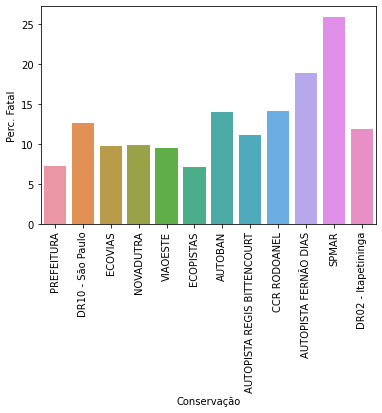

In [75]:
sns.barplot(x='Conservação',y='Perc. Fatal',data=df_Conservação)
plt.xticks(rotation=90)


<AxesSubplot:xlabel='Conservação', ylabel='value'>

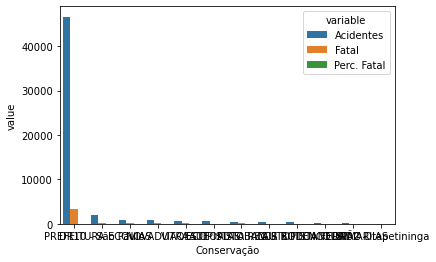

In [76]:
df_Conservação_mltd = df_Conservação.melt(id_vars='Conservação')
df_Conservação_mltd
sns.barplot(x=df_Conservação_mltd['Conservação'],y=df_Conservação_mltd['value'],hue=df_Conservação_mltd['variable'])

In [77]:
# NEXT Steps:
-Checar se Target encoder está certo!! checar com o Marcus
-Checar se RF está overfitando! ESTÁ!! deixar assim por enquanto e tirar dúvida depois
# -fazer o feature importance..entender a importancia da feature ano!
# -ano ta zuado...tirar do dataset e recalcular feature importance
# - Fazer comparação do RFE e RFECV
# -RFECV é melhor....usar ele
# -entender se da pra usar todas as features escolhidas...(se teremos input do usuário). MODELO 3 escolhido
# -Reduzir numero de variáveis baseado no RFECV
# -Rodar com menos variáveis e comparar resultado
# -criar pipeline
# -Criar artefato usando joblib
- entender o que é o imputer!!
-criar interface gráfica e inputs para o modelo
-voltar e tunar modelo:
    -Testar diferentes modelos
    -Tunar hiperparâmetros (gridsearch)
    -mexer com balanceamento
    -etc...
-ta faltando um heatmap em algum lugar....fazer um depois do encoder? ou passar um get dummies só pro heatmap

SyntaxError: invalid syntax (<ipython-input-77-7a9ce7ec98cd>, line 2)

In [ ]:
# dúvidas:
# -formatos str, int, float para treinar modelo. exemplo: ano do dataset. tenho apenas 5 categorias, (2016-2020)...deve ser tratado como cat,int ou float?
# -para as numéricas, scale, standardize, normalize??? quando usar cada um desses??? e se não usar???
# -para as cat...usar get gummies?? isso já é considerado um encoder?? e outros encoders??? One hot encodr=get dummies, label encoder=apenas distribui labels sem ordinariedade.....ordinary encoder quando tem que ser bom e ruim (ex). taget encoder=
# -PASSAR GET DUMMIES DEPOIS DE SPLIT!!
# -Dificuldades de entender o que tenho que colocar no pipeline.....get dummies? só o modelo? DEPENDE DO INPUT DO USUÁRIO!!!]
# -DÚVIDAS DO 06_TRAIN

# Como fazer meu modelo prever alguma coisa sendo que não tenho todas as features disponíveis no input do usuário.... TENHO QUE DIMINUIR O NUMERO DE VARIAVEIS....

# proximos passos: 
# -eliminar get dummies, usar ordinal, target ou label encoder depois do split....fazer isso no 05 e depois incluir no pipeline